In [169]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# If you want the exact same dataset as the YouTube video,
# use this link: https://drive.google.com/file/d/1WLm1AEYgU28Nk4lY4zNkGPSctdImbhJI/view?usp=sharing

In [1]:
import pandas as pd

df = pd.read_csv('data/stock/UNIP3.SA.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-19,3.290000,3.290000,2.530773,2.530773,1.025119,0.0
1,2000-01-20,3.290000,3.290000,2.530773,2.530773,1.025119,0.0
2,2000-01-21,3.290000,3.290000,2.733273,2.733273,1.107144,0.0
3,2000-01-24,3.290000,3.290000,2.530773,2.530773,1.025119,0.0
4,2000-01-25,2.530773,2.530773,2.530773,2.530773,1.025119,0.0
...,...,...,...,...,...,...,...
5812,2023-03-08,75.000000,75.980003,74.699997,75.599998,75.599998,10500.0
5813,2023-03-09,75.500000,75.610001,75.059998,75.199997,75.199997,8800.0
5814,2023-03-10,75.199997,75.330002,73.500000,74.510002,74.510002,25600.0
5815,2023-03-13,74.510002,74.510002,72.519997,73.000000,73.000000,26700.0


In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2000-01-19,2.530773
1,2000-01-20,2.530773
2,2000-01-21,2.733273
3,2000-01-24,2.530773
4,2000-01-25,2.530773
...,...,...
5812,2023-03-08,75.599998
5813,2023-03-09,75.199997
5814,2023-03-10,74.510002
5815,2023-03-13,73.000000


In [3]:
df['Date']

0       2000-01-19
1       2000-01-20
2       2000-01-21
3       2000-01-24
4       2000-01-25
           ...    
5812    2023-03-08
5813    2023-03-09
5814    2023-03-10
5815    2023-03-13
5816    2023-03-14
Name: Date, Length: 5817, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [174]:
df

,Date,Close
0,2000-03-01,3.120833
1,2000-03-02,3.129166
2,2000-03-03,3.333333
3,2000-03-06,NaN
4,2000-03-07,NaN
...,...,...
5777,2023-03-01,17.940001
5778,2023-03-02,17.770000
5779,2023-03-03,18.240000
5780,2023-03-06,17.540001


In [5]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\015025631\AppData\Local\Temp\ipykernel_31816\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2000-01-19
1      2000-01-20
2      2000-01-21
3      2000-01-24
4      2000-01-25
          ...    
5812   2023-03-08
5813   2023-03-09
5814   2023-03-10
5815   2023-03-13
5816   2023-03-14
Name: Date, Length: 5817, dtype: datetime64[ns]

In [6]:
df.index = df.pop('Date')
df

,Close
Date,
2000-01-19,2.530773
2000-01-20,2.530773
2000-01-21,2.733273
2000-01-24,2.530773
2000-01-25,2.530773
...,...
2023-03-08,75.599998
2023-03-09,75.199997
2023-03-10,74.510002


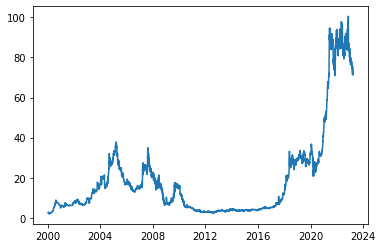

In [7]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np
# a variavel clse vai ser o consumo !!!!!!!!!!
window_size = 1 # quantos dias anteriores serão usados para prever o próximo dia
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], [] # variaveis independentes X  e dependentes Y
#
  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy() # vai ser o consumo
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=window_size)
windowed_df

,Target Date,Target-1,Target
0,2021-03-25,56.809090,57.536362
1,2021-03-26,57.536362,57.272728
2,2021-03-29,57.272728,58.818180
3,2021-03-30,58.818180,58.627274
4,2021-03-31,58.627274,57.972729
...,...,...,...
243,2022-03-17,90.809090,92.145454
244,2022-03-18,92.145454,94.081818
245,2022-03-21,94.081818,92.827271
246,2022-03-22,92.827271,91.354546


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((248,), (248, 1, 1), (248,))

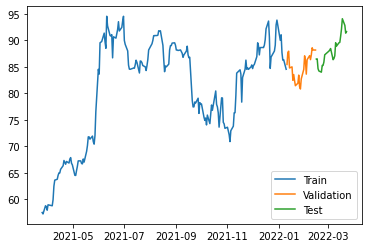

In [11]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=window_size)
dates, X, y = windowed_df_to_date_X_y(windowed_df)
model = Sequential([layers.Input((window_size, 1)),
                    layers.LSTM(70),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=65)

Epoch 1/65
7/7 [==============================] - 12s 407ms/step - loss: 6697.4834 - mean_absolute_error: 81.2475 - val_loss: 7277.3667 - val_mean_absolute_error: 85.2730
Epoch 2/65
7/7 [==============================] - 0s 41ms/step - loss: 6651.3169 - mean_absolute_error: 80.9631 - val_loss: 7239.0869 - val_mean_absolute_error: 85.0483
Epoch 3/65
7/7 [==============================] - 0s 29ms/step - loss: 6617.3623 - mean_absolute_error: 80.7541 - val_loss: 7209.1411 - val_mean_absolute_error: 84.8721
Epoch 4/65
7/7 [==============================] - 0s 24ms/step - loss: 6594.1880 - mean_absolute_error: 80.6108 - val_loss: 7191.2227 - val_mean_absolute_error: 84.7664
Epoch 5/65
7/7 [==============================] - 0s 23ms/step - loss: 6578.3569 - mean_absolute_error: 80.5132 - val_loss: 7172.4795 - val_mean_absolute_error: 84.6559
Epoch 6/65
7/7 [==============================] - 0s 27ms/step - loss: 6557.6797 - mean_absolute_error: 80.3847 - val_loss: 7143.2520 - val_mean_absolute

7/7 [==============================] - 2s 5ms/step


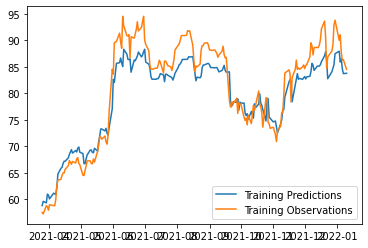

In [13]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 67ms/step


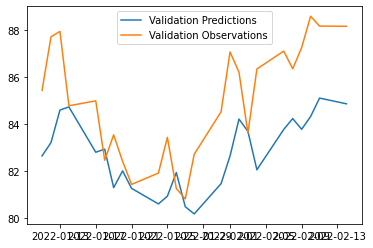

In [14]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 59ms/step


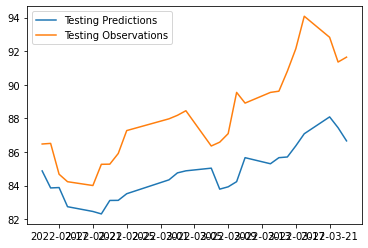

In [15]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

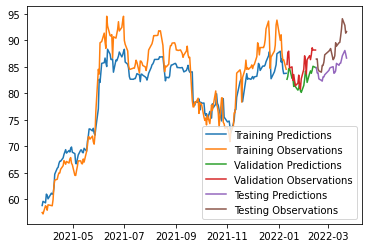

In [17]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [18]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 112ms/step


array([[[56.80909 ]],

       [[57.53636 ]],

       [[57.272728]],

       [[58.81818 ]],

       [[58.627274]],

       [[57.97273 ]],

       [[58.99091 ]],

       [[58.845455]],

       [[58.80909 ]],

       [[59.954544]],

       [[62.5     ]],

       [[63.636364]],

       [[63.80909 ]],

       [[64.545456]],

       [[65.      ]],

       [[65.      ]],

       [[65.681816]],

       [[66.36363 ]],

       [[67.34545 ]],

       [[66.63636 ]],

       [[67.163635]],

       [[66.86363 ]],

       [[67.61818 ]],

       [[67.89091 ]],

       [[66.818184]],

       [[66.527275]],

       [[64.545456]],

       [[64.527275]],

       [[65.454544]],

       [[66.25455 ]],

       [[67.27273 ]],

       [[67.27273 ]],

       [[66.77273 ]],

       [[66.70909 ]],

       [[67.62727 ]],

       [[67.045456]],

       [[69.06364 ]],

       [[70.163635]],

       [[71.80909 ]],

       [[71.79091 ]],

       [[71.36363 ]],

       [[71.94546 ]],

       [[70.87273 ]],

       [[70

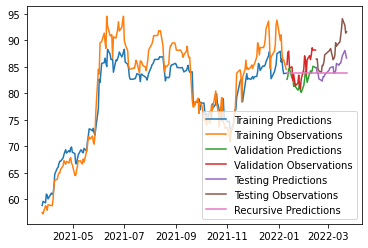

In [19]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

In [20]:
import plotly.express as px
df_fig = pd.DataFrame({'pred':test_predictions,'real':y_test})
df_fig.index = dates_test

fig = px.line(df_fig,x=df_fig.index,y=['pred','real'])
fig.show()

In [190]:
df_fig

,pred,real
2022-02-15,28.225185,26.400000
2022-02-16,26.581497,26.510000
2022-02-17,26.717655,24.959999
2022-02-18,24.781639,24.639999
2022-02-21,24.377808,24.740000
2022-02-22,24.504135,24.910000
2022-02-23,24.718624,23.700001
2022-02-24,23.185137,23.500000
2022-02-25,22.930334,25.100000
2022-03-02,24.957920,27.129999


In [54]:
model.predict(np.array([[[74.11]],[[75.1]],[[66]]]))



1/1 [==============================] - 0s 68ms/step


array([[75.183136],
       [75.966934],
       [68.1463  ]], dtype=float32)